In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:\Machine Learning Projects\Stroke_Prediction\healthcare-dataset-stroke-data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nelli\AppData\Local\Temp\ipykernel_13444\1906945035.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('C:\Machine Learning Projects\Stroke_Prediction\healthcare-dataset-stroke-data.csv')


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.loc[df.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


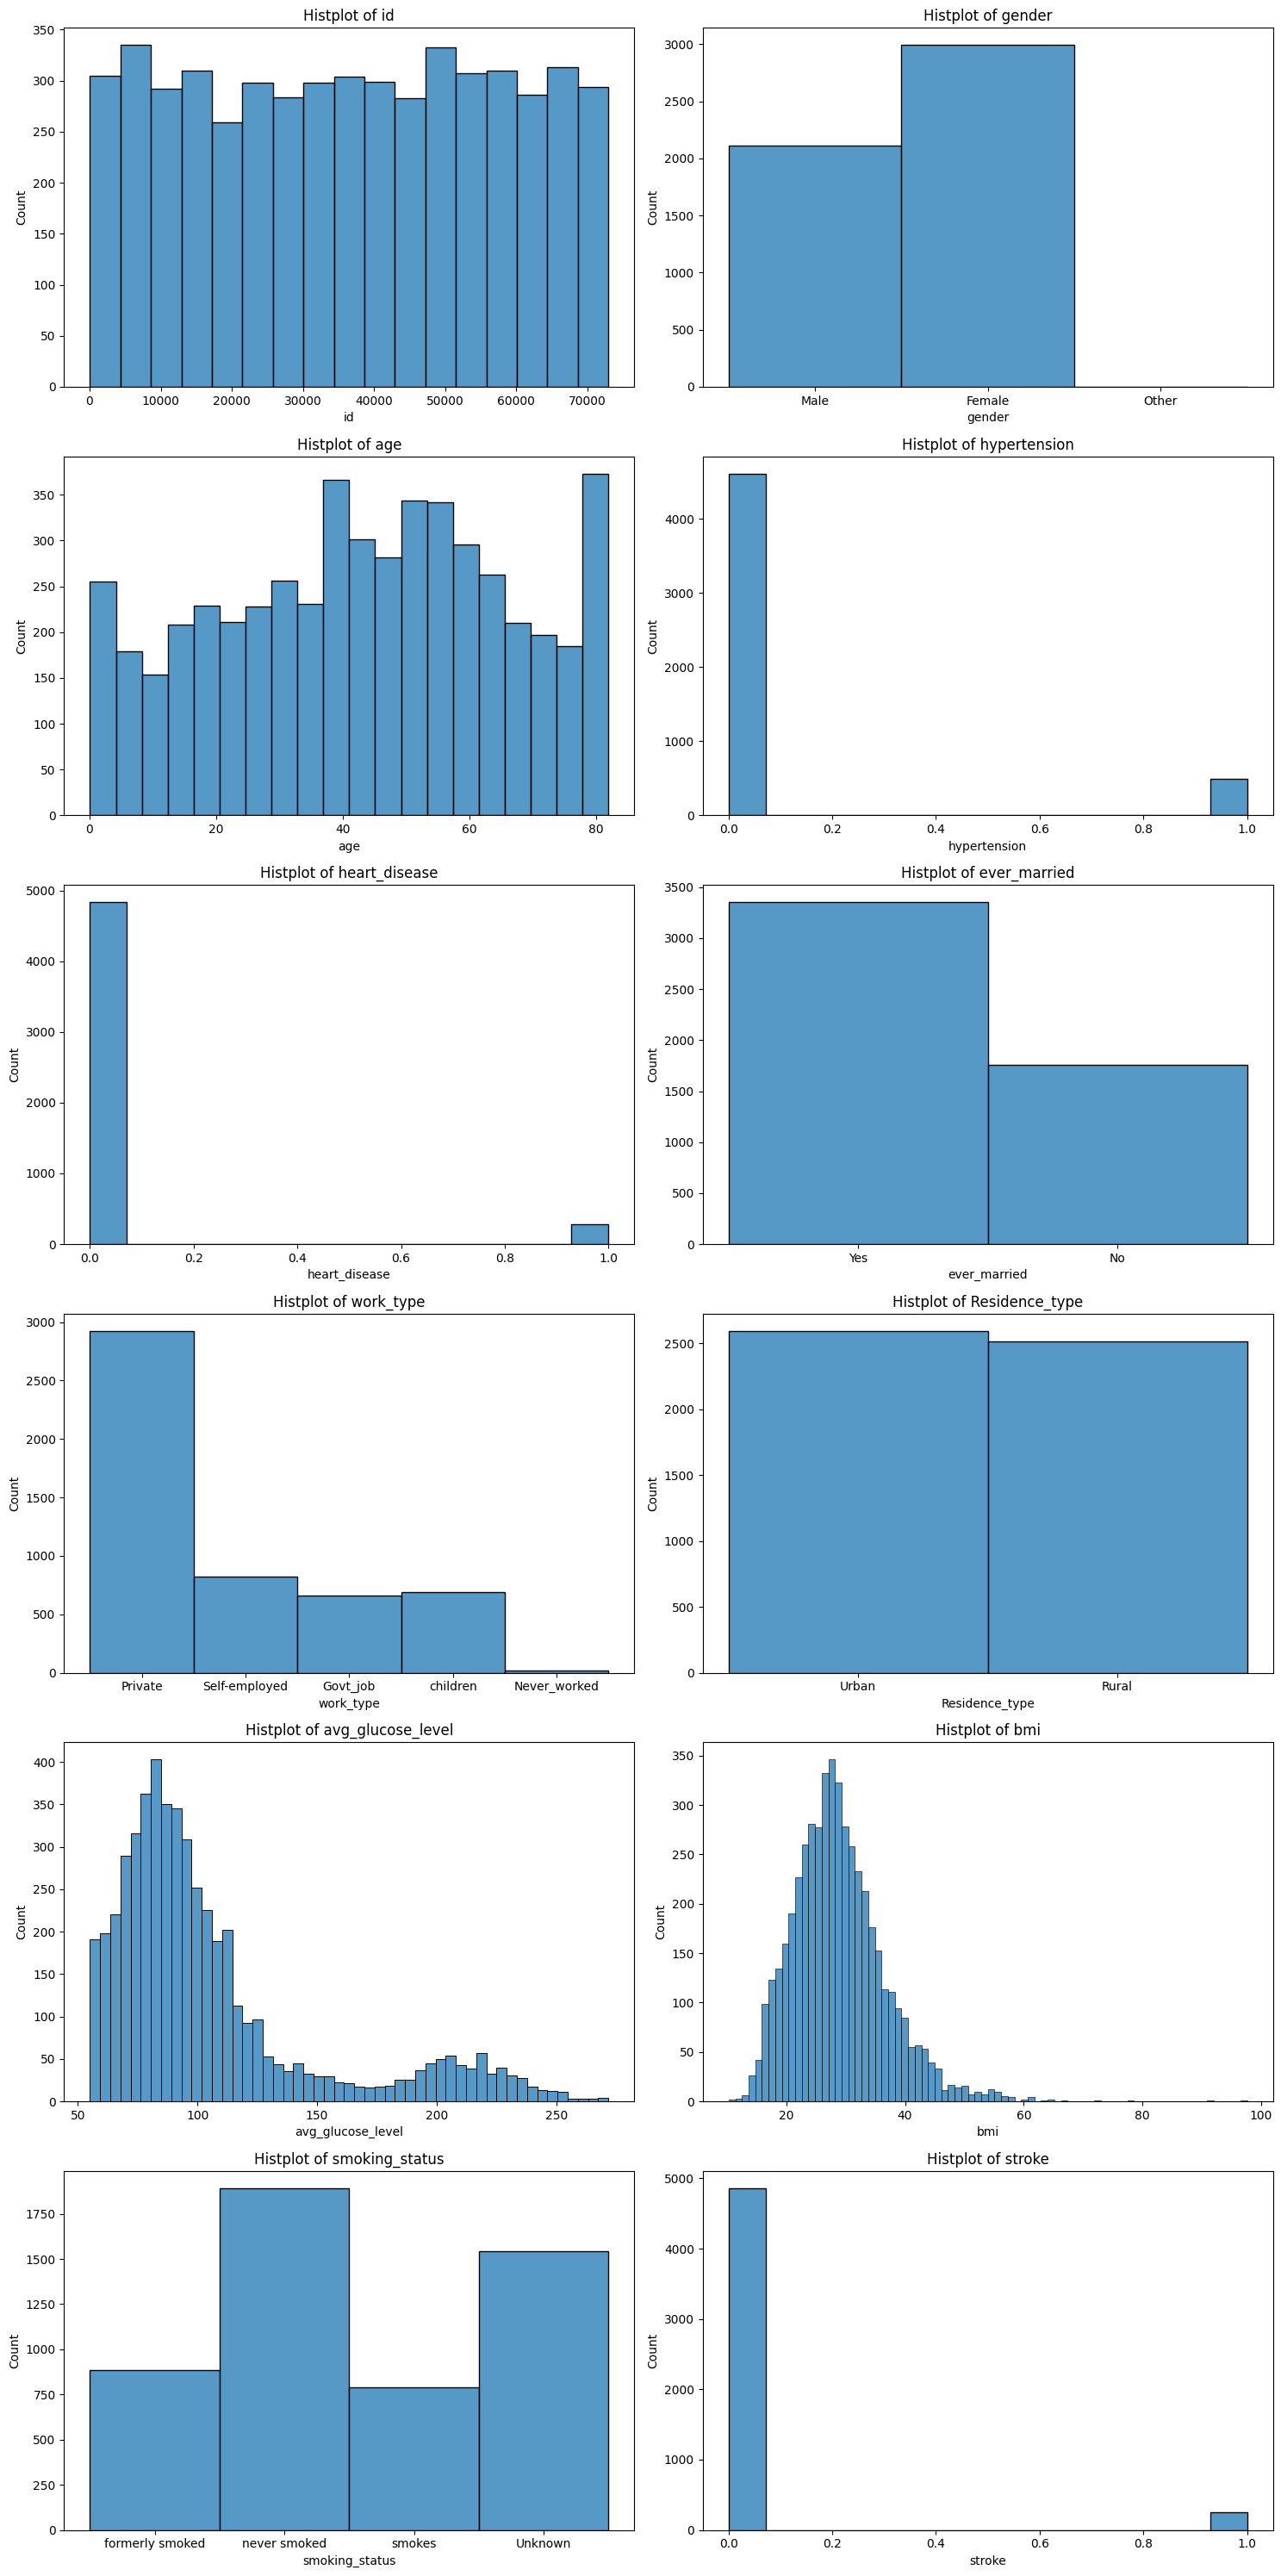

In [8]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (cols_per_row + num_cols - 1)// cols_per_row
plt.figure(figsize=(15, 5 * num_rows))  
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i) 
    sns.histplot(data=df, x=col)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

In [9]:
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean())

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
cat_cols = df.select_dtypes(exclude='number')
num_cols = df.select_dtypes(exclude='object')
cat_cols

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [12]:
for col in cat_cols.columns: 
    unq_val = df[col].unique()
    print(f'unique values in {col} : {unq_val}')

unique values in gender : ['Male' 'Female' 'Other']
unique values in ever_married : ['Yes' 'No']
unique values in work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
unique values in Residence_type : ['Urban' 'Rural']
unique values in smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [13]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [14]:
df.loc[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [15]:
df['gender'] = df['gender'].replace('Other', df['gender'].mode()[0])

In [16]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [17]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

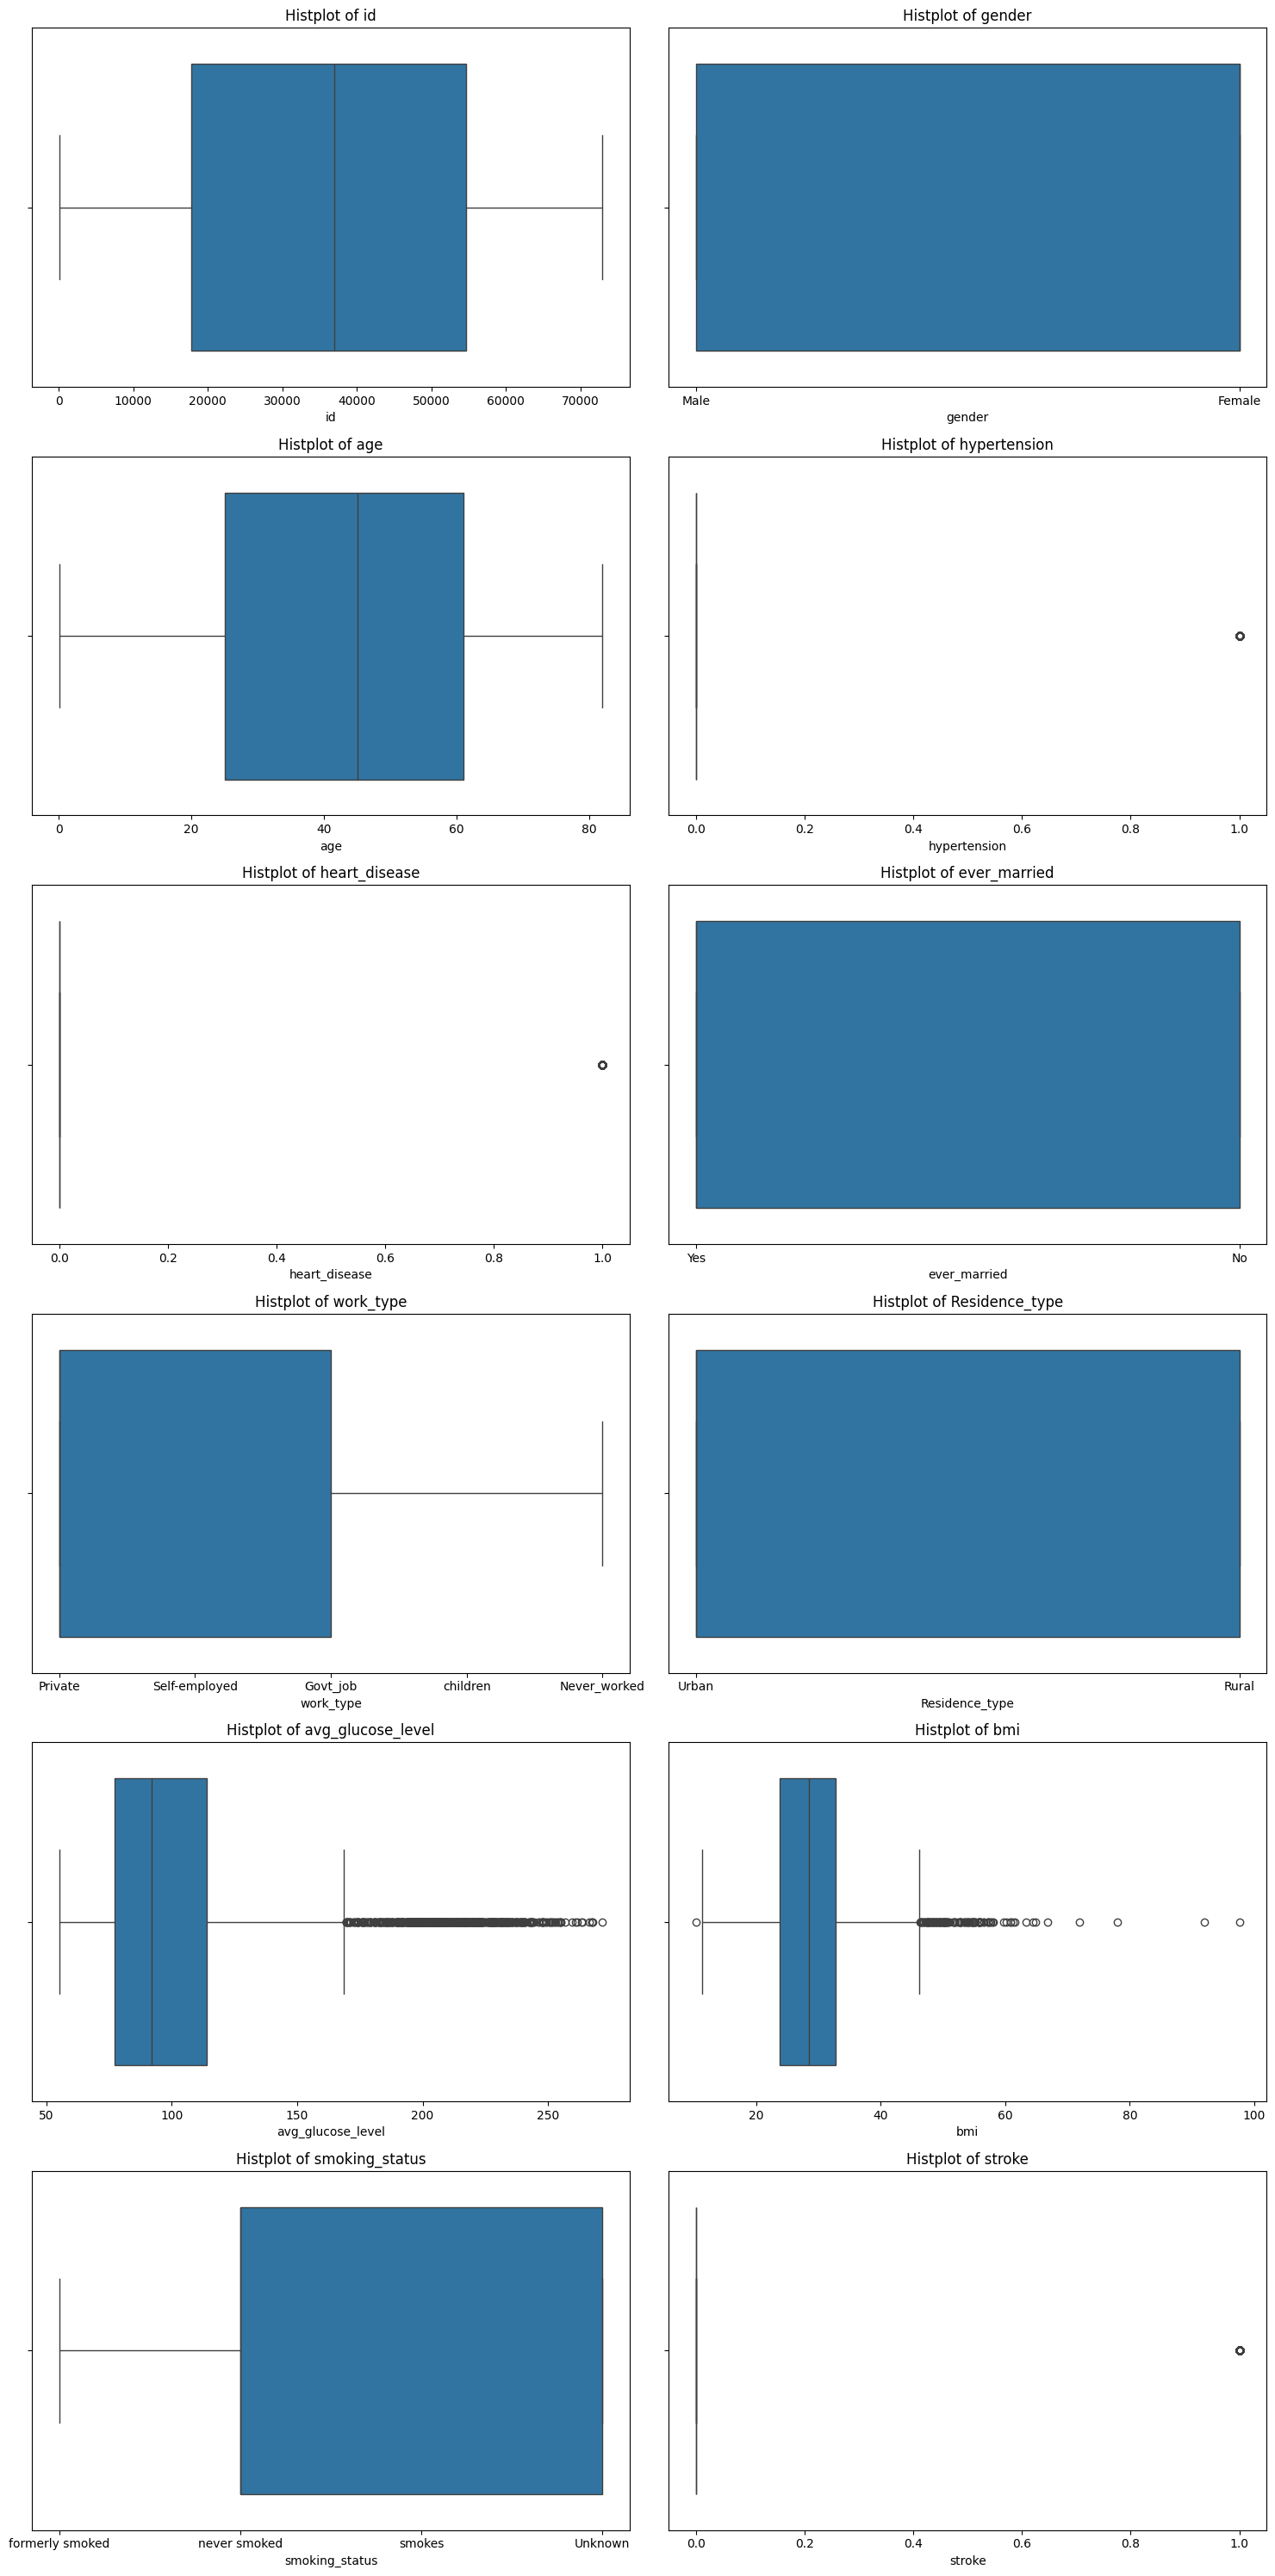

In [18]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (cols_per_row + num_cols - 1)// cols_per_row
plt.figure(figsize=(15, 5 * num_rows))  
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i) 
    sns.boxplot(data=df, x=col)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

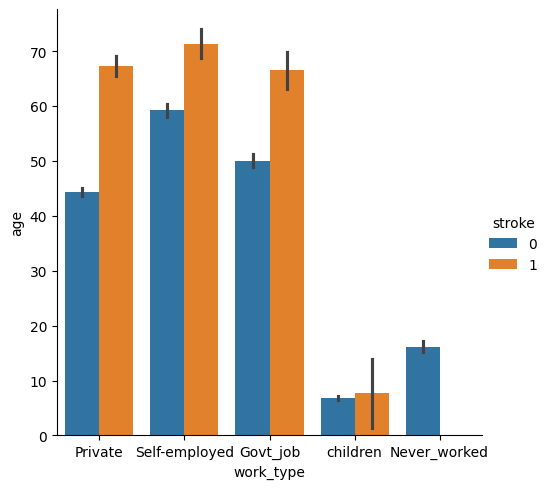

In [19]:
sns.catplot(x="work_type", y="age", hue="stroke", data=df, kind="bar")
plt.show()

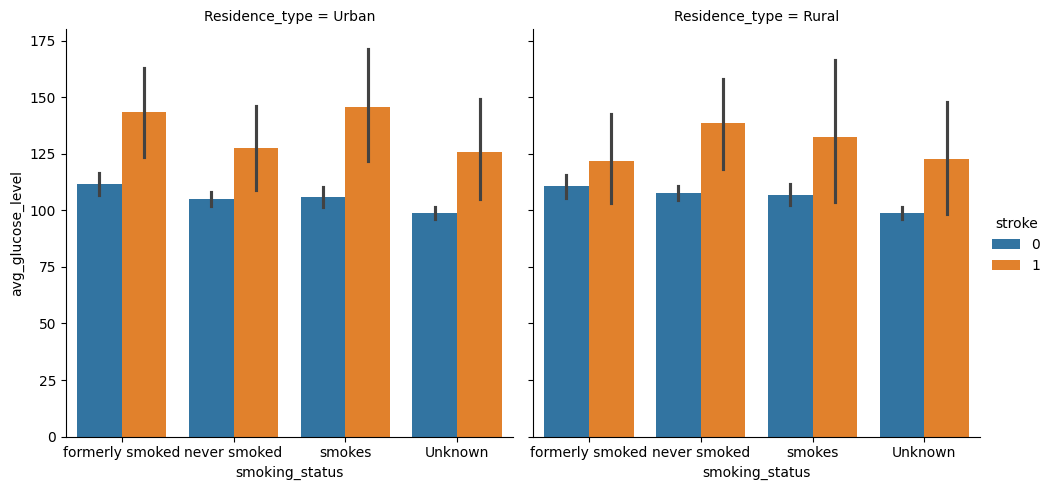

In [20]:
sns.catplot(x='smoking_status',y='avg_glucose_level',hue = 'stroke' ,data=df, kind='bar',col='Residence_type')
plt.show()

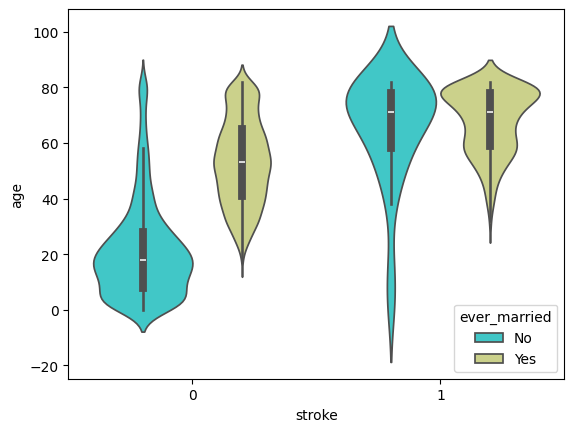

In [21]:
sns.violinplot(x="stroke", y="age", data=df,palette='rainbow',hue='ever_married')
plt.show()

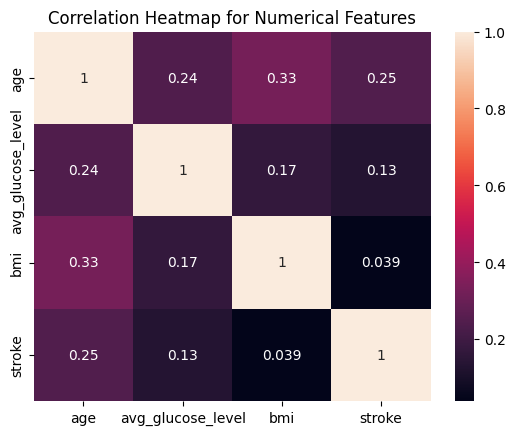

In [22]:
numerical_with_stroke = ['age','avg_glucose_level','bmi', 'stroke']
heatmap = sns.heatmap(df[numerical_with_stroke].corr(), annot=True)

# Adding a title to the plot:
heatmap.set_title('Correlation Heatmap for Numerical Features')
plt.show()

The model is performing well in predicting the majority class (no stroke) but is failing to predict the minority class (stroke). 
This is a common issue in classification tasks with imbalanced datasets.

In [23]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

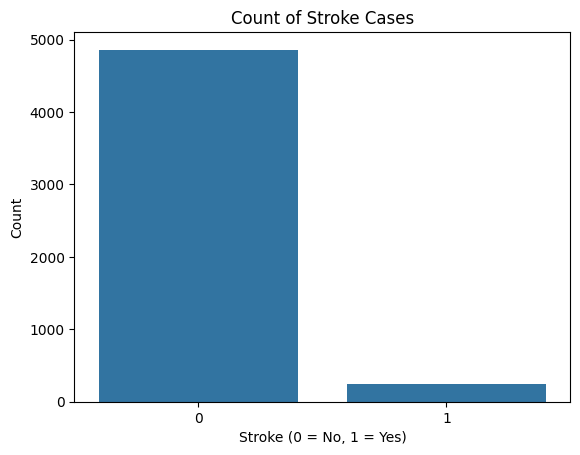

In [24]:
sns.countplot(x='stroke', data=df)
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [26]:
df_minority = df[df['stroke']==1]
df_majority = df[df['stroke'] == 0]

from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,replace=True,
        n_samples=len(df_majority),
        random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.reset_index(drop=True)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

df_full_train,df_test = train_test_split(df_upsampled,test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

x_test = df_test.drop(columns=['stroke'])
x_train = df_train.drop(columns=['stroke'])
x_val = df_val.drop(columns=['stroke'])

y_test = df_test['stroke'].values
y_train = df_train['stroke'].values
y_val = df_val['stroke'].values

del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

features = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
            'avg_glucose_level', 'bmi','smoking_status']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

modles = {
    'LogisticRegression':{
        'model': LogisticRegression(random_state=1,n_jobs=-1),
        'params':{
            'max_iter':[100,200,300]
        }
    }, 
    'DecisionTree':{
        'model': DecisionTreeClassifier(random_state=1),
        'params':{
            'max_depth':[1,3,5,7,9,10,12], 
            'min_samples_split':[1,3,5,7,9,10,12] 
        }
    }, 
    'RandomForest':{
        'model': RandomForestClassifier(random_state=1,n_jobs=-1),
        'params':{
            'max_depth':[1,3,5,7,9,10,12],
            'n_estimators':[1,3,5,7,9,10,12]
        }
    },
    'AdaBoost':{
        'model': AdaBoostClassifier(random_state=1),
        'params':{
            'n_estimators':[1,3,5,7,9,10,12],
            'learning_rate':[0.1,0.01]
        }
    },
    'GradientBoosting':{
        'model': GradientBoostingClassifier(random_state=1),
        'params':{
            'max_depth':[1,3,5,7,9,10,12],
            'n_estimators':[1,3,5,7,9,10,12]
        }
    },
    'BalancedRandomClassifier':{
        'model':BalancedRandomForestClassifier(random_state=42,n_jobs=-1),
        'params':{
            'max_depth':[1,3,5,7,9,10,11,13,20],
            'n_estimators':range(10,201,10)
        }
    }
}

results = []
for model_name,model_params in modles.items():
    grid_search = GridSearchCV(model_params['model'],model_params['params'],
                              scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
    grid_search.fit(x_train,y_train)
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    results.append({
        'Model': model_name,
        'Best Accuracy': best_accuracy,
        'Best Params': best_params
    })

results_df = pd.DataFrame(results)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits


D:\downloads\my_anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\downloads\my_anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\downloads\my_anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\downloads\my_anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\downloads\my_anaconda\Lib\site-packages

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits


D:\downloads\my_anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits


D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


C:\Users\nelli\AppData\Local\Temp\ipykernel_13444\2800205744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df_upsampled, palette='Set2')


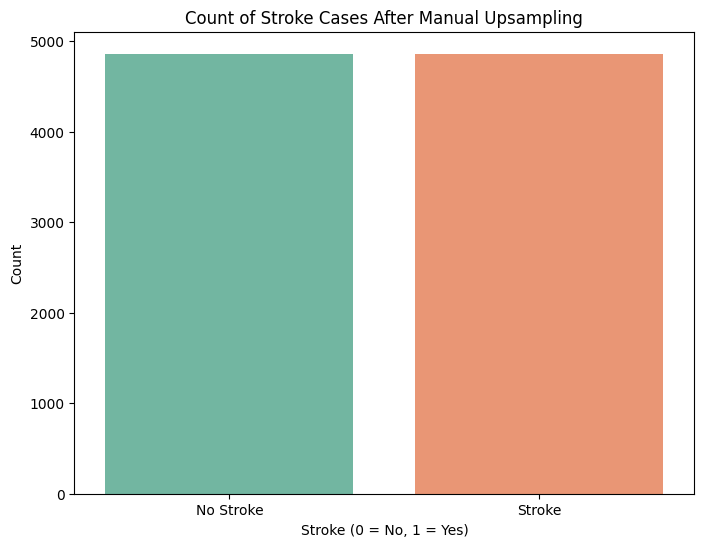

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df_upsampled, palette='Set2')
plt.title('Count of Stroke Cases After Manual Upsampling')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Stroke', 'Stroke'])  # Optional: Customize x-ticks
plt.show()

In [28]:
results_df.sort_values(by='Best Accuracy',ascending=False)

,Model,Best Accuracy,Best Params
5,BalancedRandomClassifier,0.984741,"{'max_depth': 20, 'n_estimators': 170}"
2,RandomForest,0.957477,"{'max_depth': 12, 'n_estimators': 10}"
4,GradientBoosting,0.951647,"{'max_depth': 12, 'n_estimators': 12}"
1,DecisionTree,0.936729,"{'max_depth': 12, 'min_samples_split': 3}"
0,LogisticRegression,0.785665,{'max_iter': 200}
3,AdaBoost,0.773320,"{'learning_rate': 0.1, 'n_estimators': 1}"


In [29]:
brf = BalancedRandomForestClassifier(max_depth=20,n_estimators=170,n_jobs=-1,random_state=42)
brf.fit(x_train,y_train)
y_pred = brf.predict(x_val)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
D:\downloads\my_anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.9907
Precision: 0.9817
Recall: 1.0000
F1 Score: 0.9908
Confusion Matrix:
[[963  18]
 [  0 964]]


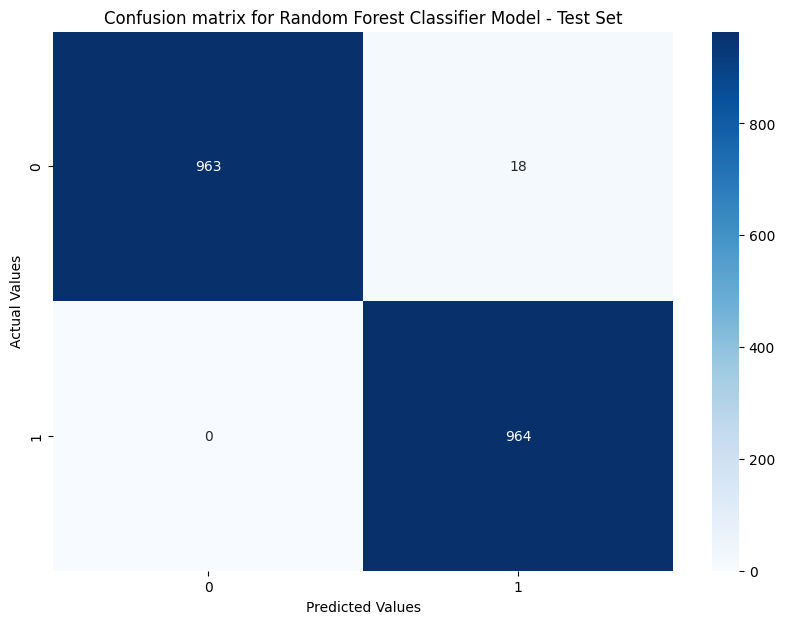

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [41]:
train_dicts[10]

{'id': 68023,
 'gender': 'Male',
 'age': 79.0,
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'Yes',
 'work_type': 'Private',
 'Residence_type': 'Rural',
 'avg_glucose_level': 72.73,
 'bmi': 28.4,
 'smoking_status': 'never smoked'}

In [42]:
person_id = 'abc123'
sample_person = {'id': 68023,
 'gender': 'Male',
 'age': 79.0,
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'Yes',
 'work_type': 'Private',
 'Residence_type': 'Rural',
 'avg_glucose_level': 72.73,
 'bmi': 28.4,
 'smoking_status': 'never smoked'}

# Convert the sample person data to the same format as the training data
sample_person_dict = [sample_person]  # Wrap in a list to match the expected input format
sample_person_vectorized = dv.transform(sample_person_dict)  # Transform using DictVectorizer

# Make the prediction
stroke_prediction = brf.predict(sample_person_vectorized)

# Check the prediction result
if stroke_prediction[0] == 1:  # 1 indicates stroke
    print('Person will have a stroke: %s' % person_id)
else:
    print('Person will not have a stroke: %s' % person_id)

Person will have a stroke: abc123


In [38]:
df.loc[df['id']=='smokes']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.800000,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.300000,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.500000,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.800000,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.500000,smokes,0
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.900000,smokes,0
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.000000,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,28.893237,smokes,0
